In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from ydata_profiling import ProfileReport
import joblib

In [196]:
df=pd.read_csv('Expresso_churn_dataset.csv')

In [197]:
df.shape

(2154048, 19)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [199]:
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [200]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [201]:
#rapport_expresso = ProfileReport(df, title="Profiling Report", explorative=True)
#rapport_expresso.to_file("profiling_report.html")

In [202]:
df.isna().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [203]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2154043    False
2154044    False
2154045    False
2154046    False
2154047    False
Length: 2154048, dtype: bool

In [204]:
df=df.drop(columns=['user_id','ZONE1','ZONE2','TENURE','REGION'],axis=1)

In [205]:
df=df.drop_duplicates()

In [206]:
df.shape

(1466565, 14)

In [207]:
df=df.dropna(axis=0)

In [208]:
df.shape

(522867, 14)

In [209]:
#Encodage des varibles ategorielles 
for col in df.columns:
    if df[col].dtype == 'object':
        df[col]=df[col].astype('category').cat.codes
df.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,0,54,84,8.0,0
3,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,0,62,28,11.0,0
7,7000.0,16.0,7229.0,2410.0,22.0,1601.0,77.0,29.0,100.0,0,55,14,8.0,0
11,12650.0,27.0,11870.0,3957.0,36.0,8453.0,431.0,66.0,6.0,0,62,84,11.0,0
18,7600.0,46.0,7875.0,2625.0,57.0,901.0,10.0,60.0,7.0,0,62,23,27.0,0


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522867 entries, 0 to 2154044
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MONTANT         522867 non-null  float64
 1   FREQUENCE_RECH  522867 non-null  float64
 2   REVENUE         522867 non-null  float64
 3   ARPU_SEGMENT    522867 non-null  float64
 4   FREQUENCE       522867 non-null  float64
 5   DATA_VOLUME     522867 non-null  float64
 6   ON_NET          522867 non-null  float64
 7   ORANGE          522867 non-null  float64
 8   TIGO            522867 non-null  float64
 9   MRG             522867 non-null  int8   
 10  REGULARITY      522867 non-null  int64  
 11  TOP_PACK        522867 non-null  int8   
 12  FREQ_TOP_PACK   522867 non-null  float64
 13  CHURN           522867 non-null  int64  
dtypes: float64(10), int64(2), int8(2)
memory usage: 52.9 MB


In [ ]:
mean = df['DATA_VOLUME'].mean()
std_dev = df['DATA_VOLUME'].std()
# Calcul des Z-scores
df['Z-score'] = (df['DATA_VOLUME'] - mean) / std_dev
seuil = 3 # Définir le seuil pour les valeurs aberrantes
df= df[np.abs(df['Z-score']) <= seuil].drop(columns=['Z-score'])# Filtrer les données pour conserver uniquement les valeurs non aberrantes
df.shape


(513324, 14)

In [212]:
df

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,0,54,84,8.0,0
7,7000.0,16.0,7229.0,2410.0,22.0,1601.0,77.0,29.0,100.0,0,55,14,8.0,0
11,12650.0,27.0,11870.0,3957.0,36.0,8453.0,431.0,66.0,6.0,0,62,84,11.0,0
18,7600.0,46.0,7875.0,2625.0,57.0,901.0,10.0,60.0,7.0,0,62,23,27.0,0
23,5450.0,14.0,5696.0,1899.0,16.0,32.0,586.0,184.0,30.0,0,25,79,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154030,5600.0,15.0,6035.0,2012.0,24.0,7388.0,1.0,41.0,2.0,0,38,36,6.0,0
2154031,17300.0,30.0,17800.0,5933.0,30.0,73.0,7.0,1516.0,4.0,0,37,64,34.0,0
2154037,900.0,4.0,686.0,229.0,5.0,0.0,72.0,7.0,1.0,0,55,84,1.0,0
2154038,1000.0,2.0,1000.0,333.0,2.0,0.0,2.0,12.0,3.0,0,12,14,2.0,0


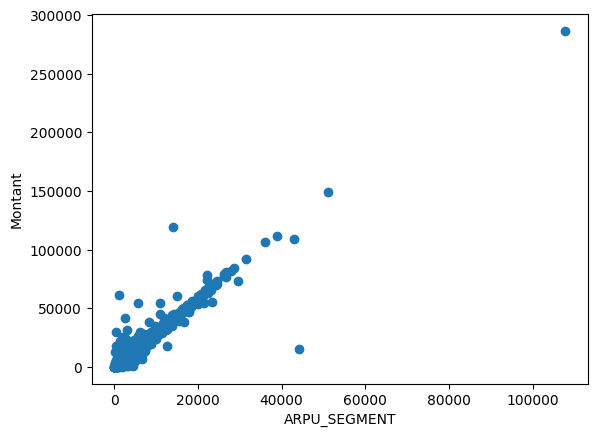

In [271]:
plt.Figure(figsize=(10,5))
plt.scatter(x=df['ARPU_SEGMENT'],y=df['MONTANT'])
plt.xlabel('ARPU_SEGMENT')
plt.ylabel('Montant')   
plt.show()

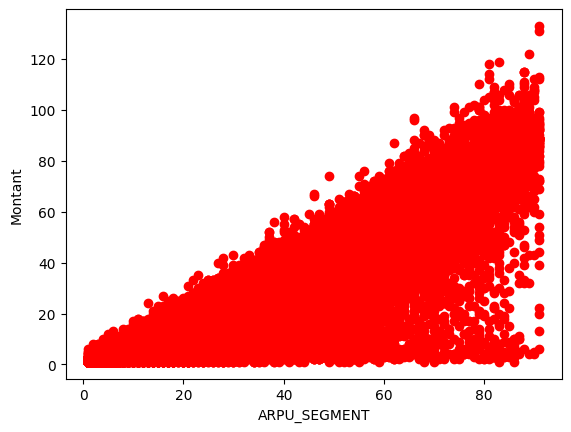

In [ ]:
plt.Figure(figsize=(10,5))
plt.scatter(x=df['FREQUENCE'],y=df['FREQUENCE_RECH'],c='red')
plt.xlabel('ARPU_SEGMENT')
plt.ylabel('Montant')   
plt.show()

In [215]:
df['CHURN'].value_counts()

CHURN
0    501545
1     11779
Name: count, dtype: int64

In [ ]:
from sklearn.utils import resample
# Séparer les classes majoritaire et minoritaire
classe_majoritaire = df[df['CHURN'] == 0]
classe_minoritaire = df[df['CHURN'] == 1]

# Sous-échantillonnage de la classe majoritaire
classe_majoritaire_downsampled = resample(classe_majoritaire,replace=False,n_samples=len(classe_minoritaire),random_state=42)

# Combiner les deux classes
df = pd.concat([classe_majoritaire_downsampled, classe_minoritaire])
df

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
655667,2500.0,3.0,2482.0,827.0,4.0,5616.0,21.0,1.0,2.0,0,26,27,2.0,0
293547,4445.0,10.0,4193.0,1398.0,15.0,478.0,1.0,2.0,5.0,0,42,45,2.0,0
1025164,2750.0,6.0,2751.0,917.0,8.0,1007.0,48.0,80.0,2.0,0,14,14,2.0,0
573030,4700.0,9.0,4070.0,1357.0,16.0,0.0,10.0,46.0,39.0,0,19,58,12.0,0
1741487,6000.0,23.0,6000.0,2000.0,25.0,5984.0,8.0,21.0,7.0,0,52,23,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152745,16500.0,3.0,17483.0,5828.0,8.0,25190.0,2.0,578.0,1.0,0,19,74,1.0,1
2152753,500.0,1.0,500.0,167.0,1.0,228.0,14.0,0.0,3.0,0,17,64,1.0,1
2153192,1600.0,3.0,1595.0,532.0,4.0,1392.0,1.0,6.0,1.0,0,7,36,2.0,1
2153476,29800.0,34.0,30300.0,10100.0,34.0,19039.0,156.0,41.0,1.0,0,62,37,16.0,1


In [223]:
df['CHURN'].value_counts()

CHURN
0    11779
1    11779
Name: count, dtype: int64

In [224]:
X=df.drop(columns=['CHURN'],axis=1)
y=df['CHURN']

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [273]:
rf_model = RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_split=10,random_state=42)

n_estimators=100,max_depth=20,min_samples_split=2

In [274]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)

In [275]:
y_predrf= rf_model.predict(X_test)

In [ ]:
print("Accuracy :", accuracy_score(y_test, y_predrf))


Accuracy : 0.7739105829088851


In [283]:
print(classification_report(y_test,y_predrf))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      3510
           1       0.78      0.76      0.77      3558

    accuracy                           0.77      7068
   macro avg       0.77      0.77      0.77      7068
weighted avg       0.77      0.77      0.77      7068



<Axes: >

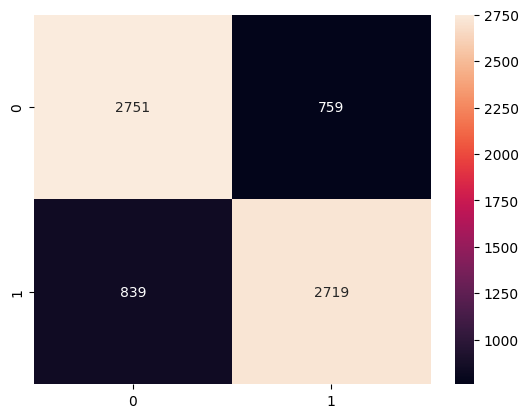

In [277]:
# Matrice de confusion
cm =confusion_matrix(y_test,y_predrf)
sns.heatmap(cm, annot=True,fmt="d")

In [261]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=10,scoring='f1',cv=5,random_state=42)                                                
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='f1')

In [270]:
# Meilleurs paramètres et score
print("Meilleurs hyperparamètres :", random_search.best_params_)
print("Meilleur score F1 :", random_search.best_score_)


Meilleurs hyperparamètres : {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 10}
Meilleur score F1 : 0.7730543928148856


In [279]:
joblib.dump(rf_model,"rf_model.pkl")
print("Modèle sauvegardé dans le fichier model.pkl")


Modèle sauvegardé dans le fichier model.pkl
